# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [2]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as npa
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [5]:
path = '/content/drive/MyDrive/car_sharing/'

In [6]:
file1 = 'Car_Images.zip'
path + file1

'/content/drive/MyDrive/car_sharing/Car_Images.zip'

In [7]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall(path)
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [8]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


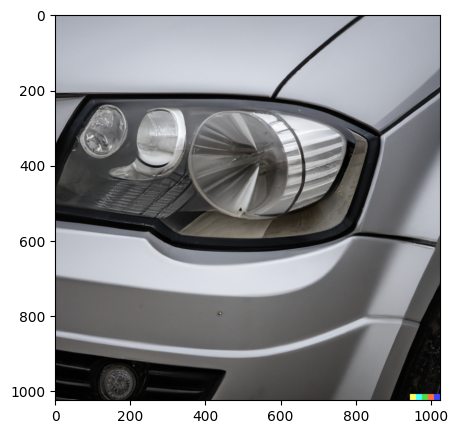

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [9]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

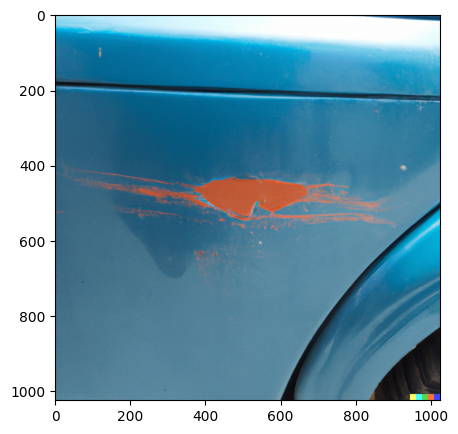

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [10]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [11]:
import cv2
import glob
import numpy as np

In [17]:
# 레이블 저장용 리스트 초기화
Y = []  # 레이블을 저장할 리스트

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for _ in normal_files:
    Y.append(0)  # 0은 정상 데이터에 대한 레이블

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for _ in abnormal_files:
    Y.append(1)  # 1은 이상 데이터에 대한 레이블

# Y 리스트를 NumPy 배열로 변환
Y = np.array(Y)

# 레이블 수 확인
print("Y 배열 크기:", Y.shape)
print("Normal 데이터 수:", len(Y[Y == 0]))
print("Abnormal 데이터 수:", len(Y[Y == 1]))

Y 배열 크기: (605,)
Normal 데이터 수: 302
Abnormal 데이터 수: 303


In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [31]:
# 이미지 파일 검색 및 데이터 저장용 리스트 초기화
X = []

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for file_path in normal_files:
    img = cv2.imread(file_path)
    if img is not None:
        # 이미지 데이터를 원하는 형식으로 처리 (컬러 이미지를 그대로 사용)
        img = cv2.resize(img, (256, 256))
        X.append(img)

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for file_path in abnormal_files:
    img = cv2.imread(file_path)
    if img is not None:
        # 이미지 데이터를 원하는 형식으로 처리 (컬러 이미지를 그대로 사용)
        img = cv2.resize(img, (256, 256))
        X.append(img)

# X 리스트를 NumPy 배열로 변환
X = np.array(X)

# X 배열의 크기 확인
print("X 배열 크기:", X.shape)

X 배열 크기: (605, 280, 280, 3)


In [32]:
X

array([[[[135, 113,  91],
         [134, 112,  90],
         [140, 116,  91],
         ...,
         [140,  98,  61],
         [139,  98,  62],
         [137,  99,  61]],

        [[140, 119,  93],
         [139, 113,  93],
         [138, 114,  90],
         ...,
         [133,  97,  58],
         [138,  98,  62],
         [138,  98,  60]],

        [[139, 115,  94],
         [139, 113,  94],
         [140, 116,  95],
         ...,
         [135,  97,  58],
         [140, 102,  63],
         [136,  98,  60]],

        ...,

        [[ 85, 107, 133],
         [ 86, 109, 137],
         [ 88, 113, 143],
         ...,
         [255,  70,  60],
         [255,  70,  60],
         [255,  70,  60]],

        [[ 92, 115, 142],
         [ 95, 118, 147],
         [ 88, 112, 141],
         ...,
         [255,  70,  60],
         [255,  70,  60],
         [255,  70,  60]],

        [[ 83, 106, 133],
         [ 83, 106, 135],
         [ 84, 107, 135],
         ...,
         [255,  70,  60],
        

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [19]:
from sklearn.model_selection import train_test_split

In [33]:
# 데이터를 Test set으로 나눔 (10%)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# Test set에서 Validation set을 추출 (10%)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.11, random_state=42)

# 각 세트의 크기 확인
print("학습 세트 크기:", x_train.shape, y_train.shape)
print("검증 세트 크기:", x_val.shape, y_val.shape)
print("테스트 세트 크기:", x_test.shape, y_test.shape)

학습 세트 크기: (484, 280, 280, 3) (484,)
검증 세트 크기: (61, 280, 280, 3) (61,)
테스트 세트 크기: (60, 280, 280, 3) (60,)


#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [34]:
import os
# 각각 경로 지정
train_path = path + 'Car_Images_train'
val_path = path + 'Car_Images_val'
test_path = path + 'Car_Images_test'


# train 폴더
# test 폴더 만들기 os.mkdir()
if not os.path.exists(train_path):
    os.mkdir(train_path)
    os.mkdir(train_path + '/normal')
    os.mkdir(train_path + '/abnormal')


# test 폴더 만들기 os.mkdir()
if not os.path.exists(test_path):
    os.mkdir(test_path)
    os.mkdir(test_path + '/normal')
    os.mkdir(test_path + '/abnormal')


# validation 폴더 만들기
if not os.path.exists(val_path):
    os.mkdir(val_path)
    os.mkdir(val_path + '/normal')
    os.mkdir(val_path + '/abnormal')

#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [36]:
# 원본 이미지 파일이 있는 디렉토리
src_dir = '/content/drive/MyDrive/car_sharing/abnormal'

In [35]:
train_dir = train_path + '/abnormal'
val_dir = val_path + '/abnormal'
test_dir = test_path + '/abnormal'

In [37]:
# 이미지 파일 목록 가져오기
image_files = os.listdir(src_dir)
random.shuffle(image_files)

# 파일 분할 비율 설정
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# 파일을 분할하여 복사
total_files = len(image_files)
train_end = int(total_files * train_ratio)
val_end = int(total_files * (train_ratio + val_ratio))

for i, image_file in enumerate(image_files):
    src_path = os.path.join(src_dir, image_file)
    if i < train_end:
        dst_dir = train_dir
    elif i < val_end:
        dst_dir = val_dir
    else:
        dst_dir = test_dir

    dst_path = os.path.join(dst_dir, image_file)
    shutil.copy(src_path, dst_path)

print("파일 복사가 완료되었습니다.")

파일 복사가 완료되었습니다.


In [42]:
src_dir_n = '/content/drive/MyDrive/car_sharing/normal'
train_dir_n = train_path + '/normal'
val_dir_n = val_path + '/normal'
test_dir_n = test_path + '/normal'

In [43]:
# 이미지 파일 목록 가져오기
image_files = os.listdir(src_dir_n)
random.shuffle(image_files)

# 파일 분할 비율 설정
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# 파일을 분할하여 복사
total_files = len(image_files)
train_end = int(total_files * train_ratio)
val_end = int(total_files * (train_ratio + val_ratio))

for i, image_file in enumerate(image_files):
    src_path = os.path.join(src_dir_n, image_file)
    if i < train_end:
        dst_dir = train_dir_n
    elif i < val_end:
        dst_dir = val_dir_n
    else:
        dst_dir = test_dir_n

    dst_path = os.path.join(dst_dir, image_file)
    shutil.copy(src_path, dst_path)

print("파일 복사가 완료되었습니다.")

파일 복사가 완료되었습니다.


In [44]:
# 폴더별 이미지 데이터 갯수 확인

print(f"이미지 데이터는 {len(glob.glob(train_dir_n+'/*'))}장 입니다.")
print(f"이미지 데이터는 {len(glob.glob(val_dir_n+'/*'))}장 입니다.")
print(f"이미지 데이터는 {len(glob.glob(test_dir_n+'/*'))}장 입니다.")


이미지 데이터는 241장 입니다.
이미지 데이터는 30장 입니다.
이미지 데이터는 31장 입니다.


#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [45]:
# 레이블 저장용 리스트 초기화
Y = []  # 레이블을 저장할 리스트

# 정상 데이터 처리
normal_files = glob.glob(path+'normal/*')
for _ in normal_files:
    Y.append(0)  # 0은 정상 데이터에 대한 레이블

# 이상 데이터 처리
abnormal_files = glob.glob(path+'abnormal/*')
for _ in abnormal_files:
    Y.append(1)  # 1은 이상 데이터에 대한 레이블

# Y 리스트를 NumPy 배열로 변환
Y = np.array(Y)

# 레이블 수 확인
print("Y 배열 크기:", Y.shape)
print("Normal 데이터 수:", len(Y[Y == 0]))
print("Abnormal 데이터 수:", len(Y[Y == 1]))

Y 배열 크기: (605,)
Normal 데이터 수: 302
Abnormal 데이터 수: 303


#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [50]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [53]:
# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(256, 256, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 140, 140, 128)     147584    
                                                             

#### 2) 학습

In [64]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints'
# path = root_path + 'model1/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [65]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, callbacks=[es, mc, lr_reduction])

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.6513 - accuracy: 0.6405

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 19s 1s/step - loss: 0.6513 - accuracy: 0.6405 - val_loss: 0.6604 - val_accuracy: 0.6557 - lr: 5.0000e-04
Epoch 2/15
16/16 [==============================] - 8s 484ms/step - loss: 0.5664 - accuracy: 0.7066 - val_loss: 0.8099 - val_accuracy: 0.6885 - lr: 5.0000e-04
Epoch 3/15
16/16 [==============================] - 8s 486ms/step - loss: 0.5886 - accuracy: 0.7273 - val_loss: 1.0838 - val_accuracy: 0.5738 - lr: 5.0000e-04
Epoch 4/15
16/16 [==============================] - 8s 488ms/step - loss: 0.5492 - accuracy: 0.7624 - val_loss: 0.8759 - val_accuracy: 0.6393 - lr: 5.0000e-04
Epoch 5/15
16/16 [==============================] - 8s 492ms/step - loss: 0.4879 - accuracy: 0.7831 - val_loss: 0.6670 - val_accuracy: 0.6230 - lr: 5.0000e-04
Epoch 6/15
16/16 [==============================] - 8s 487ms/step - loss: 0.4623 - accuracy: 0.7872 - val_loss: 0.6833 - val_accuracy: 0.6393 - lr: 5.0000e-04
Epoch 7/15
16/16 [==============================] - 8s 484m

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

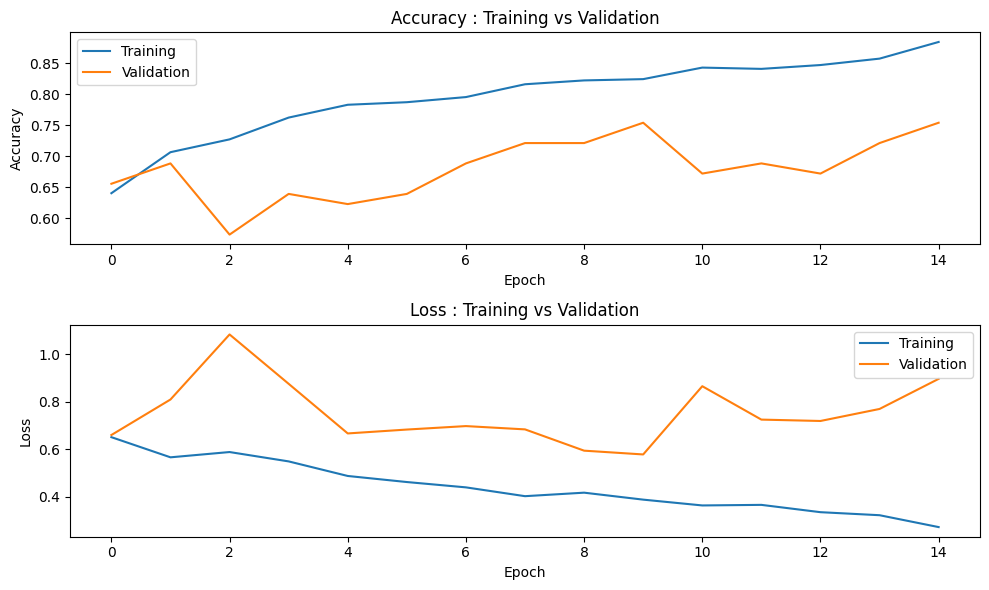

In [66]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

In [67]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 144ms/step - loss: 0.5544 - accuracy: 0.7833


[0.5544185638427734, 0.7833333611488342]

In [68]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)

2/2 [==============================] - 0s 136ms/step


In [69]:
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

[[17  6]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.83      0.81      0.82        37

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

### (3) 모델 3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [133]:
img_size =256
train_path = '/content/drive/MyDrive/car_sharing/Car_Images_train'
valid_path = '/content/drive/MyDrive/car_sharing/Car_Images_val'
test_path = '/content/drive/MyDrive/car_sharing/Car_Images_test'

In [134]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [135]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal']
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

Found 483 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


#### 3) 구조 설계

In [136]:

# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 140, 140, 128)     147584    
                                                             

#### 4) 학습

In [137]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints'
# path = root_path + 'model1/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'model1/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [138]:
# history = model.fit(train_generator, validation_data=valid_generator, epochs=10000, callbacks=[es, mc, lr_reduction])
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, callbacks=[es, mc])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 0.7182 - accuracy: 0.4845

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 43s 2s/step - loss: 0.7182 - accuracy: 0.4845 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 41s 3s/step - loss: 0.6940 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 36s 2s/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
16/16 [==============================] - 31s 2s/step - loss: 0.6935 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
16/16 [==============================] - 37s 2s/step - loss: 0.6931 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
16/16 [==============================] - 40s 3s/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 42s 3s/step - loss: 0.6931 - accuracy: 0.4928 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
16/16 [=============

#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

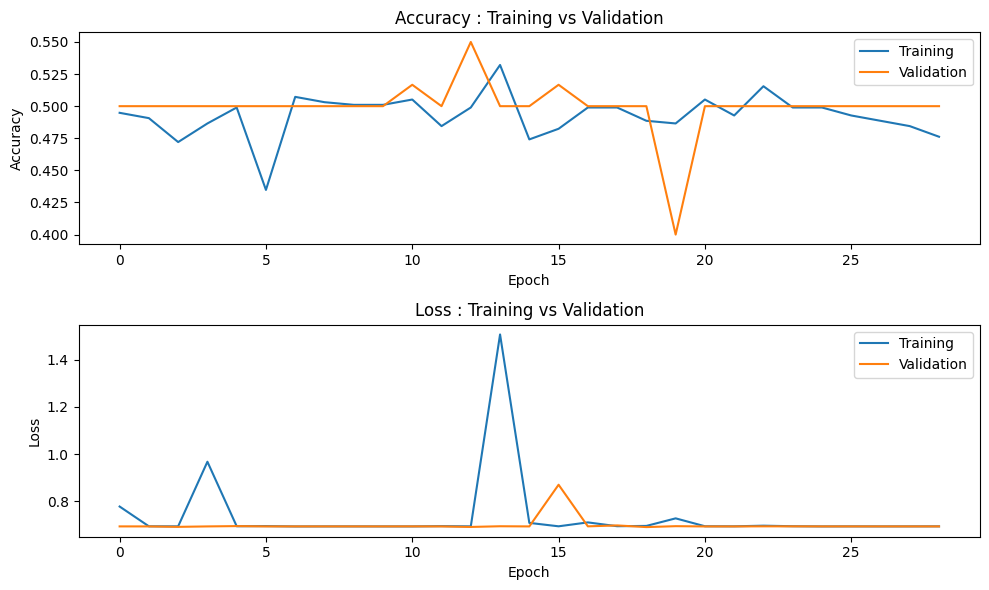

In [121]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

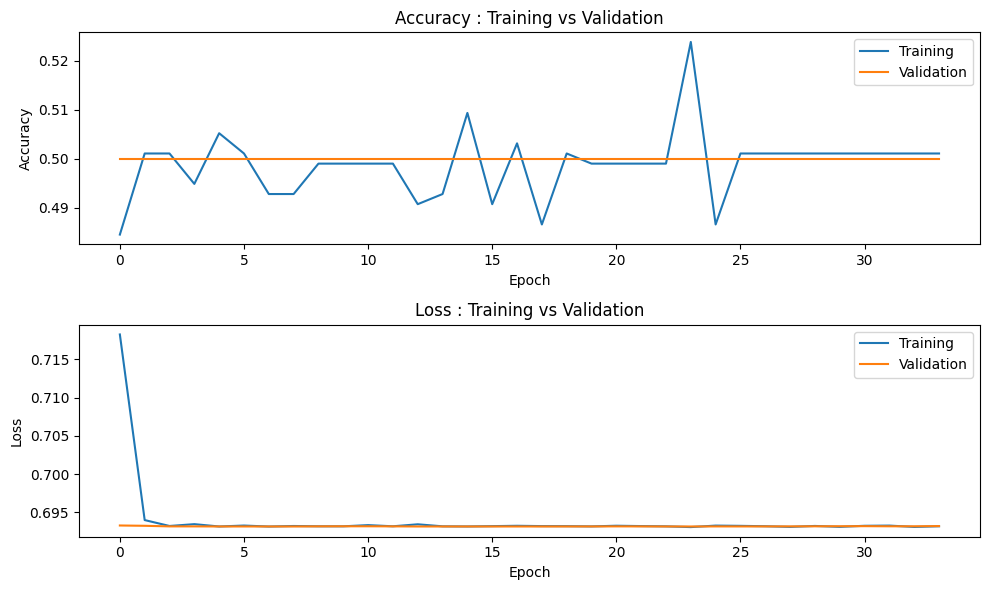

In [139]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

In [140]:
y_pred = model.predict(x_test)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

2/2 [==============================] - 0s 178ms/step
[[ 0 23]
 [ 0 37]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.62      1.00      0.76        37

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 176ms/step - loss: 0.6536 - accuracy: 0.6167


[0.6536089777946472, 0.6166666746139526]

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [142]:
from tensorflow.keras.applications import VGG16

In [143]:
img_size=256

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [144]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(img_size, img_size, 3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 70, 70, 128)       0     

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [145]:
keras.backend.clear_session()

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(img_size, img_size, 3))

hl = Flatten()(base_model.output)
hl = Dense(512, activation='relu')(hl)
ol = Dense(1, activation='sigmoid')(hl)

model = Model(base_model.input, ol)

In [146]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [147]:
es = EarlyStopping(monitor='val_loss', patience=10, min_delta=0, verbose=1, restore_best_weights=True)

root_path = '/content/drive/MyDrive/car_sharing/checkpoints/'
# path = root_path + 'model2/{epoch:02d}-{val_loss:.4f}-{val_accuracy:.2f}.h5'
path = root_path + 'VGG16_Dense/save_model.h5'
mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

In [148]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=50, callbacks=[es, mc, lr_reduction])

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 51.5008 - accuracy: 0.5342

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 49s 3s/step - loss: 51.5008 - accuracy: 0.5342 - val_loss: 0.6967 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
16/16 [==============================] - 46s 3s/step - loss: 0.6941 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
16/16 [==============================] - 45s 3s/step - loss: 0.7274 - accuracy: 0.5093 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
16/16 [==============================] - 53s 3s/step - loss: 1.3487 - accuracy: 0.4886 - val_loss: 0.6925 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/50
16/16 [==============================] - 33s 2s/step - loss: 1.2046 - accuracy: 0.5176 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/50
16/16 [==============================] - 31s 2s/step - loss: 0.6936 - accuracy: 0.5010 - val_loss: 0.6936 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/50
16/16 [==============================] - 31s 2s/step - loss: 0.6935 - accuracy: 0

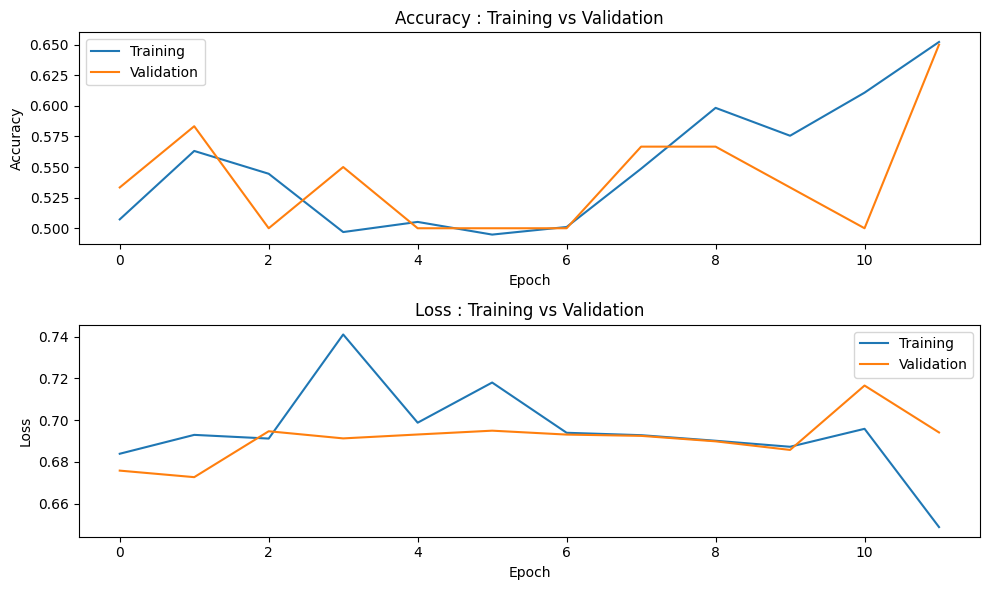

In [131]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

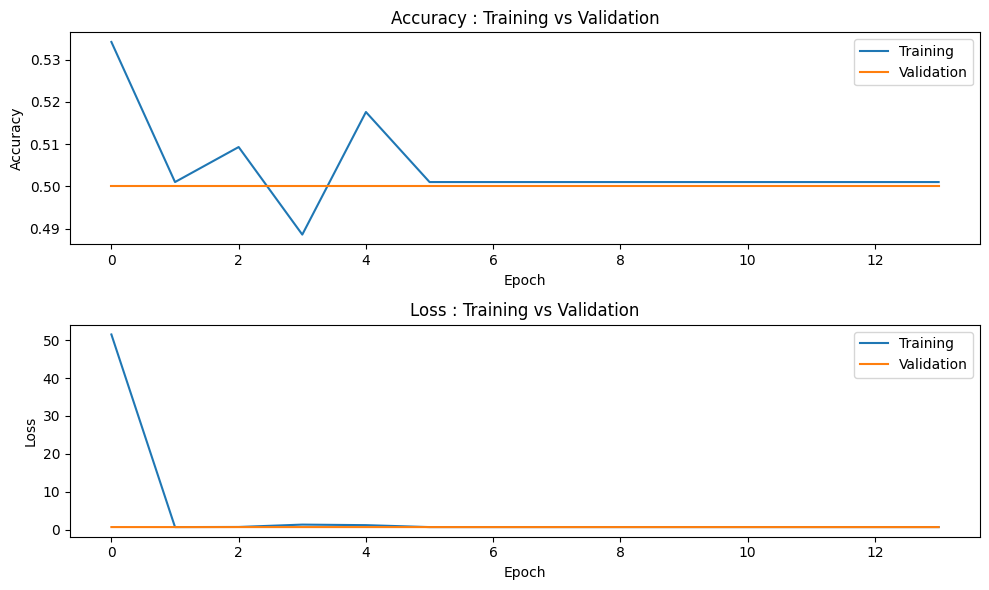

In [149]:
if not isinstance(history, dict):
    history = history.history

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)

plt.subplot(2, 1, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.tight_layout()
plt.show()

#### 4) 성능 평가

In [132]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))

model.evaluate(test_generator)

2/2 [==============================] - 2s 964ms/step
[[20 11]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.69      0.81      0.75        31

    accuracy                           0.73        62
   macro avg       0.73      0.73      0.72        62
weighted avg       0.73      0.73      0.72        62

2/2 [==============================] - 3s 1s/step - loss: 0.5405 - accuracy: 0.7258


[0.5405437350273132, 0.725806474685669]

In [150]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))

model.evaluate(test_generator)

2/2 [==============================] - 6s 2s/step
[[ 0 31]
 [ 0 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.50      1.00      0.67        31

    accuracy                           0.50        62
   macro avg       0.25      0.50      0.33        62
weighted avg       0.25      0.50      0.33        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 2s 974ms/step - loss: 0.7008 - accuracy: 0.5000


[0.7007878422737122, 0.5]

In [ ]:
# 성능 가이드

# Accuracy : 0.34~0.74